# How to Test

### Equivalence partitioning

Think hard about the different cases the code will run under: this is science, not coding!

We can't write a test for every possible input: this is an infinite amount of work.

We need to write tests to rule out different bugs. There's no need to separately test *equivalent* inputs. 

Let's look at an example of this question outside of coding:

<img src=Saskatchewan.jpg  height="300" width="300">

* Research Project : Evolution of agricultural fields in Saskatchewan from aerial photography
* In silico translation  : Compute overlap of two rectangles

In [14]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

Let's make a little fragment of matplotlib code to visualise a pair of fields.

In [15]:
def show_fields(field1, field2):
    def vertices(left, bottom, right, top):
        verts = [(left, bottom),
                 (left, top),
                 (right, top),
                 (right, bottom),
                 (left, bottom)]
        return verts
    
    codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.CLOSEPOLY]
    path1 = Path(vertices(*field1), codes)
    path2 = Path(vertices(*field2), codes)         
    fig = plt.figure()
    ax = fig.add_subplot(111)
    patch1 = patches.PathPatch(path1, facecolor='orange', lw=2)
    patch2 = patches.PathPatch(path2, facecolor='blue', lw=2)         
    ax.add_patch(patch1)
    ax.add_patch(patch2)       
    ax.set_xlim(0,5)
    ax.set_ylim(0,5)



### Test

OK, so how might our tests be useful? 

Here's some code that **might** correctly calculate the area of overlap:

In [16]:
def overlap(field1, field2):
    left1, bottom1, top1, right1 = field1
    left2, bottom2, top2, right2 = field2
    overlap_left=max(left1, left2)
    overlap_bottom=max(bottom1, bottom2)
    overlap_right=min(right1, right2)
    overlap_top=min(top1, top2)
    overlap_height=(overlap_top-overlap_bottom)
    overlap_width=(overlap_right-overlap_left)
    return overlap_height*overlap_width

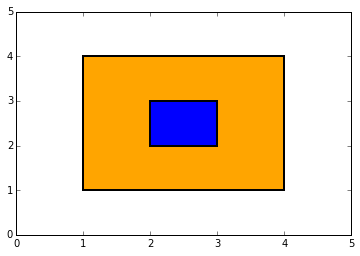

In [17]:
show_fields((1.,1.,4.,4.),(2.,2.,3.,3.))

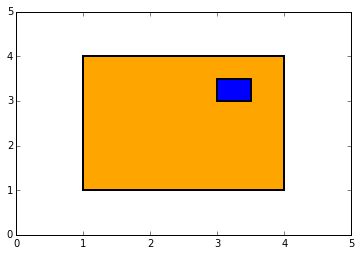

In [18]:
show_fields((1.,1.,4.,4.),(3.,3.,3.5,3.5))

So how do we check our code? 

###Exercise 1
please write down sensible some more sensible (non-equivalent) tests. 
* give the test case.
* give one example of fixture(input), and excepted output

### Exercise 2

* Correct the `overlap` function.
* Write tests.

In [ ]:
# new overlap

In [ ]:
# tests

Note, we reran our other tests, to check our fix didn't break something else. (We call that "fallout")

## Always test on boundary cases
* Limit between two equivalent array/class/list: edge and corner
* Wherever indices sappear, check values at 0, N, N+1
* Empty arrays
* What happens when a matrix/data-frame reaches one row or one column?




## Positive *and* negative tests

* **Positive tests**: code should give correct answer with various inputs
* **Negative tests**: code should crash as expected given invalid inputs, rather than lying

<div align="left">
Bad input should be expected and should fail early and explicitly.

<div class="fragment roll-in">
Testing should ensure that explicit failures do indeed happen.

In [1]:
assert not 1==2

In [11]:
1-'x'

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [4]:
from nose.tools import assert_raises

In [12]:
with assert_raises(TypeError):
    assert 1 - 'x'